In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import os

In [2]:
os.chdir('./data')
df_main = pd.read_csv('processed_data.csv')
df_main.set_index('timestamp', inplace=True)
df_main.index = pd.to_datetime(df_main.index)
df_main.columns

Index(['SP_load_MAW', 'DE_B09_MAW', 'DE_B20_MAW', 'SE_load_MAW', 'NE_B20_MAW',
       'NE_B18_MAW', 'NE_B19_MAW', 'DK_load_MAW', 'DE_B18_MAW', 'DE_B19_MAW',
       ...
       'PO_green_surplus_MAW', 'HU_green_MAW', 'HU_green_surplus_MAW',
       'IT_green_MAW', 'IT_green_surplus_MAW', 'UK_green_MAW',
       'UK_green_surplus_MAW', 'max_surplus_country_name',
       'max_surplus_country_code', 'max_surplus_country_code_next_hr'],
      dtype='object', length=135)

In [4]:
relevant_countries = ['DK', 'UK', 'SE', 'DE']
relevant_cols = [col for col in df_main.columns if ('green_surplus' in col and col.split('_')[0] in relevant_countries)]

# reverse order of relevant_cols
relevant_cols = relevant_cols[::-1]
df_green_surplus= df_main[relevant_cols]

print(len(df_green_surplus))
print(df_green_surplus.columns)

8761
Index(['UK_green_surplus_MAW', 'DK_green_surplus_MAW', 'SE_green_surplus_MAW',
       'DE_green_surplus_MAW'],
      dtype='object')


In [7]:
if (find_best_lags_bool == True) :
        
    p_vals = range(3,6)
    q_vals = range(3,6)

    all_res = []

    for idx, data_name in enumerate(relevant_cols) :

        print('= '*30)
        print(f"start {data_name} {idx+1}/{len(relevant_cols)}")

        # demean data
        mean = df_green_surplus[data_name].mean()
        data = df_green_surplus[data_name] - mean
        # set frequency to hourly
        data = data.asfreq('H')

        # Create dataframe to store results
        results = []

        # Loop through p and q values
        for p_val in p_vals:
            for q_val in q_vals:

                print(f"p={p_val}, q={q_val}")

                try:
                    # Fit ARIMA model
                    order = (p_val, 0, q_val)
                    model = ARIMA(data, order=order)
                    fit_model = model.fit(low_memory=True)

                    # Get BIC and AIC values
                    bic = fit_model.bic
                    aic = fit_model.aic

                    # Save results in the dataframe
                    results.append({'country' : data_name, 'mean' : mean,
                                    'p': p_val, 'q': q_val, 
                                    'BIC': bic, 'AIC': aic, 'IC_comb' : bic+aic})

                except Exception as e:
                    print(f"An error occurred: {e}")

        results_df = pd.DataFrame(results)
        print(results_df)

        # Find the best p and q based on lowest combined AIC and BIC
        best_params = results_df.loc[results_df['IC_comb'].idxmin()]
        print('-'*30)
        print(f"Best p = {best_params['p']}, best q = {best_params['q']}")
        print('-'*30)

        # save best params p and q in dataframe for each loop iteration
        all_res.append(best_params)

    all_res_df = pd.DataFrame(all_res)

else :

    # resort to historic best lags from test phase

    data = {
    'country': ['DE_green_surplus_MAW', 'SE_green_surplus_MAW', 'DK_green_surplus_MAW', 'UK_green_surplus_MAW'],
    'p': [3, 5, 5, 5],
    'q': [5, 3, 4, 4]
}

all_res_df = pd.DataFrame(data)

/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


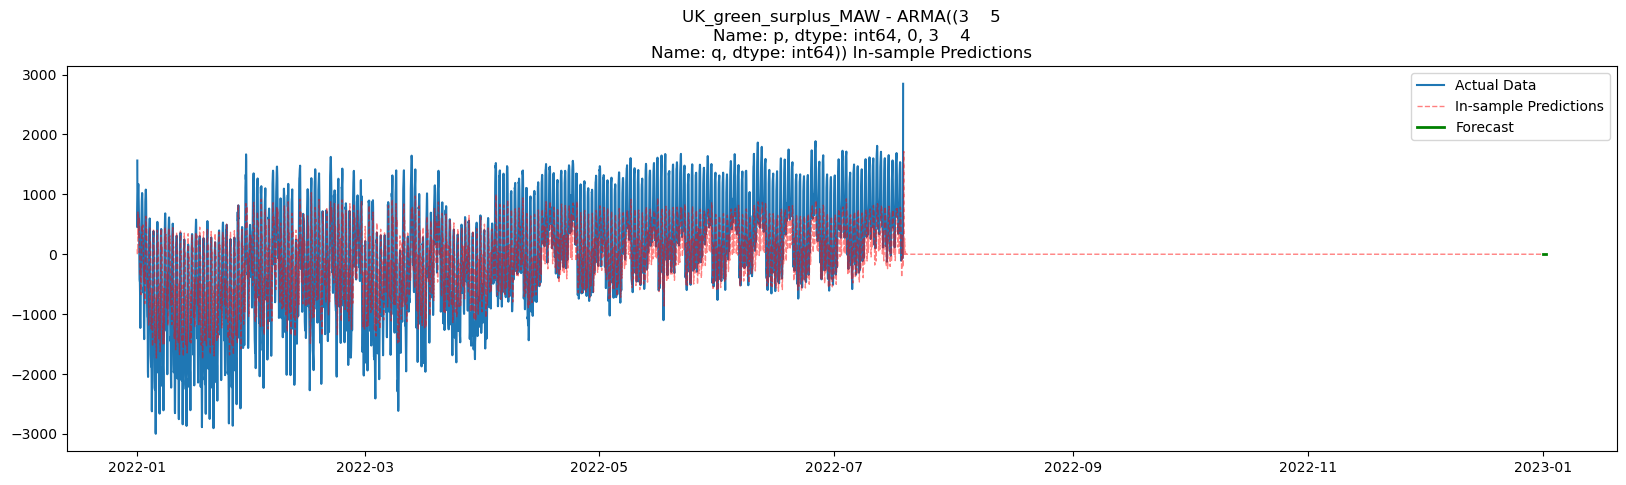

/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


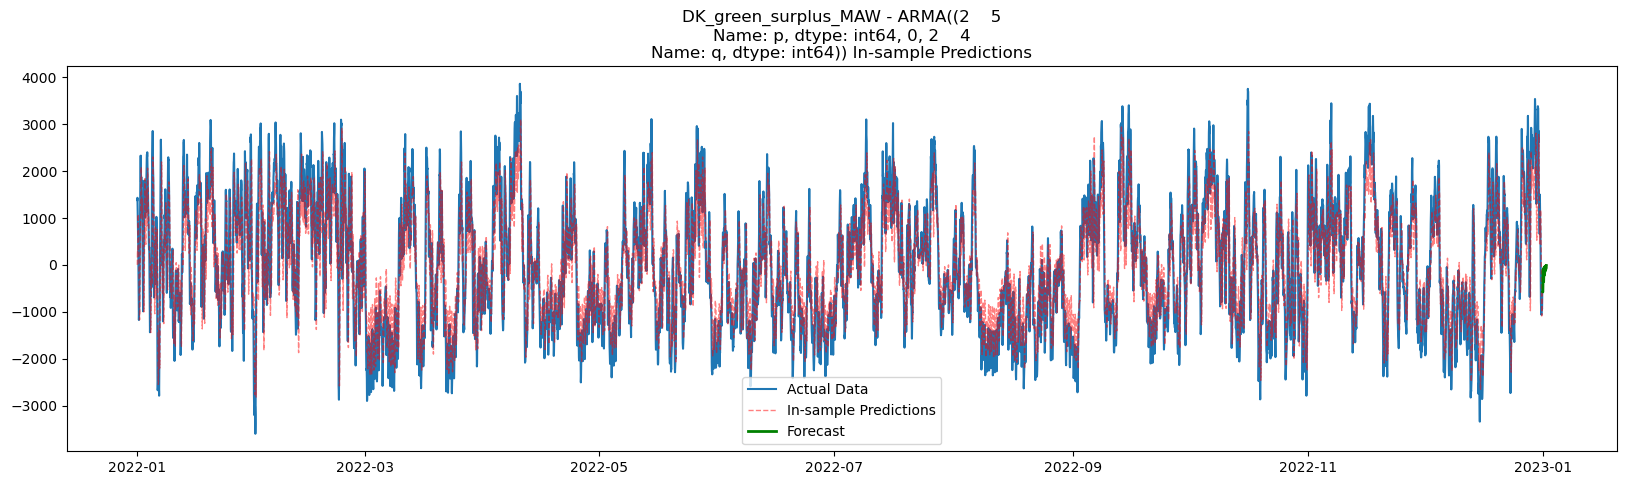

/Users/yanting/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


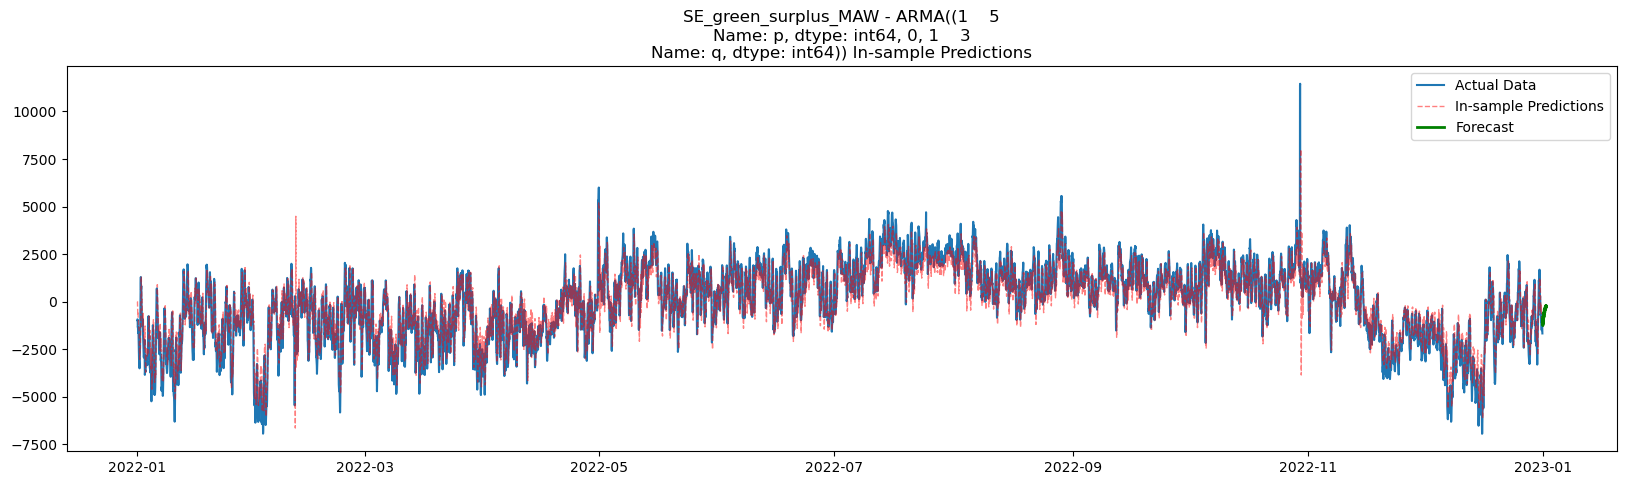

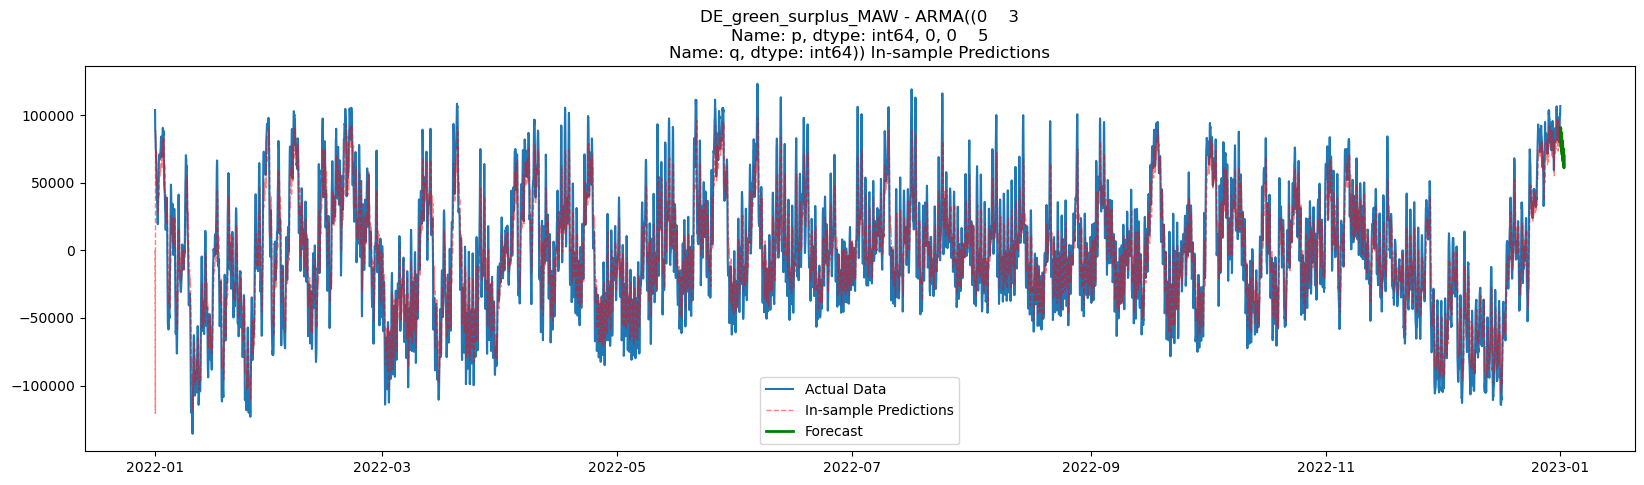

,UK_green_surplus_MAW,DK_green_surplus_MAW,SE_green_surplus_MAW,DE_green_surplus_MAW,max_surplus_country_name
2023-01-01 00:00:00+00:00,-2901.698836,-1617.708595,-4118.213688,-18433.192972,DK
2023-01-01 01:00:00+00:00,-2901.698836,-1620.461872,-4556.798942,-21646.831558,DK
2023-01-01 02:00:00+00:00,-2901.698836,-1325.302676,-4182.428740,-18273.676944,DK
2023-01-01 03:00:00+00:00,-2901.698836,-1138.555574,-4462.865428,-28223.620325,DK
2023-01-01 04:00:00+00:00,-2901.698836,-1352.212851,-4191.281849,-32742.900363,DK
2023-01-01 05:00:00+00:00,-2901.698836,-1397.361715,-3869.971699,-21565.187815,DK
2023-01-01 06:00:00+00:00,-2901.698836,-1399.059476,-4176.693385,-31153.169996,DK
2023-01-01 07:00:00+00:00,-2901.698836,-1217.054596,-3914.880070,-35508.046684,DK
2023-01-01 08:00:00+00:00,-2901.698836,-1101.900184,-4111.001606,-24736.959390,DK
2023-01-01 09:00:00+00:00,-2901.698836,-1233.648296,-3921.071432,-33976.147873,DK


In [8]:
model_dict = {}
df_forecast = pd.DataFrame()
df_data = df_green_surplus[relevant_cols]
h = 24

for data_name in relevant_cols :

    # demean data
    mean = df_green_surplus[data_name].mean()
    data = df_green_surplus[data_name] - mean
    # set frequency to hourly
    data = data.asfreq('H')
    
    res_row = all_res_df[all_res_df['country'] == data_name]
    order = (res_row['p'], 0, res_row['q'])

    final_model = ARIMA(data, order=order)
    final_fit = final_model.fit()
    model_dict[data_name] = final_fit

    # In-sample predictions
    predictions = final_fit.predict()
    df_data[f"{data_name}_insamp_pred"] = predictions + mean

    # Make forecast for next h hours
    forecast = model_dict[data_name].forecast(steps=h)

    # Add forecast + mean to df_forecast
    mean = df_green_surplus[data_name].mean()
    df_forecast[data_name] = forecast + mean
    
    # Plot the original data, in sample predictions, and fcast
    plt.figure(figsize=(20, 5))

    plt.plot(data, label='Actual Data')
    plt.plot(predictions, label='In-sample Predictions', color='red', lw=1, linestyle='--', alpha=0.5)
    plt.plot(forecast, label='Forecast', color='green', lw=2, linestyle='-')

    plt.title(f"{data_name} - ARMA({order}) In-sample Predictions")
    plt.legend()
    plt.show()

# calculate which fcast is highest and put in column 'max_surplus_country_name'
df_forecast['max_surplus_country_name'] = df_forecast.apply(lambda row: max(relevant_countries, key=lambda country: row[f"{country}_green_surplus_MAW"]), axis=1)
df_forecast

In [5]:
from sklearn.metrics import classification_report

y_true = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.50      1.00      0.67         1
     class 1       0.00      0.00      0.00         1
     class 2       1.00      0.67      0.80         3

    accuracy                           0.60         5
   macro avg       0.50      0.56      0.49         5
weighted avg       0.70      0.60      0.61         5

